In [1]:
# df = pd.read_hdf('/home/klay6683/to_keep/l1a_dark_scan.h5', 'df')
df = pd.read_hdf('/Users/klay6683/data/iuvs/l1a_dark_scan.h5', 'df')

In [2]:
df.head()

,ANC_SVN_REVISION,BIN_PATTERN_INDEX,BIN_TBL,BITPIX,BLANK,BUNDLE_ID,CADENCE,CAPTURE,CASE_TEMP,CHANNEL,...,SPA_SIZE,SPE_OFS,SPE_SIZE,TARGET_NAME,TIMESTAMP,UTC,XUV,mean,median,std
0,1145,LINEAR linear_0011,"LINEAR 11,12 linear_0011",32,-1,raw,2,2015/067 Mar 08 05:11:57.86878UTC,5.246964,FUV,...,115,52,8,MARS,4.790635e+08,2015/067 Mar 08 05:11:57.86878UTC,FUV,1.161304,1.144420,0.201202
1,1145,LINEAR linear_0011,"LINEAR 11,12 linear_0011",32,-1,raw,2,2015/067 Mar 08 05:11:57.86878UTC,5.246964,FUV,...,115,52,8,MARS,4.790635e+08,2015/067 Mar 08 05:11:59.86878UTC,FUV,1.104368,1.086578,0.215619
2,1141,LINEAR linear_0006,"LINEAR 15,16 linear_0006",32,-1,raw,15,2015/025 Jan 25 20:45:08.45005UTC,4.760925,FUV,...,80,0,4,MARS,4.754907e+08,2015/025 Jan 25 20:45:08.45005UTC,FUV,0.293088,0.274858,0.081759
3,1141,LINEAR linear_0006,"LINEAR 15,16 linear_0006",32,-1,raw,15,2015/025 Jan 25 20:45:08.45005UTC,4.760925,FUV,...,80,0,4,MARS,4.754907e+08,2015/025 Jan 25 20:45:23.45006UTC,FUV,0.290655,0.272145,0.081497
4,1141,LINEAR linear_0006,"LINEAR 15,16 linear_0006",32,-1,raw,15,2015/025 Jan 25 20:45:08.45005UTC,4.760925,FUV,...,80,0,4,MARS,4.754907e+08,2015/025 Jan 25 20:45:38.45007UTC,FUV,0.295681,0.277354,0.086342


### removing items that don't change
I determine via unique-ness measure if there's ever a change of the value in a column. If not, I drop the column as not meaningful for a independent variable search.

In [3]:
to_drop = []
for col in df:
    n_unique = len(df[col].unique())
    if n_unique == 1:
        print(col)
        print(df[col].unique())
        to_drop.append(col)
df = df.drop(to_drop, axis=1)

BITPIX
[32]
BLANK
[-1]
BUNDLE_ID
['raw']
EXTEND
[True]
GRATING_SELECT
['LOWRES']
KEYHOLE_SELECT
['NEITHER']
OBSERVATION_TYPE
['CDS']
ORBIT_SEGMENT
[0]
SIMPLE
[True]


In [4]:
from iuvs import io, scaling, meta

In [5]:
df['CAPTURE'] = df.CAPTURE.map(io.iuvs_utc_to_dtime)

In [6]:
df.UTC = df.UTC.map(io.iuvs_utc_to_dtime)

In [7]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CAPTURE', 'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'ET', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'TARGET_NAME', 'TIMESTAMP', 'UTC', 'XUV', 'mean', 'median',
       'std'],
      dtype='object')

In [8]:
df.rename(columns=lambda x: 'TIME_OF_INT' if x=='UTC' else x, inplace=True)

In [9]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CAPTURE', 'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'ET', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'TARGET_NAME', 'TIMESTAMP', 'TIME_OF_INT', 'XUV', 'mean',
       'median', 'std'],
      dtype='object')

### Remove all times apart of time of integration for now

In [10]:
df = df.drop('et timestamp capture'.upper().split(), axis=1)

In [11]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'TARGET_NAME', 'TIME_OF_INT', 'XUV', 'mean', 'median',
       'std'],
      dtype='object')

### CHANNEL and XUV are the same so remove one of it

In [12]:
(df.XUV == df.CHANNEL).all()

True

In [13]:
df = df.drop(['XUV'], axis=1)

In [14]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_CREATION_DATE',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS', 'SPA_SIZE', 'SPE_OFS',
       'SPE_SIZE', 'TARGET_NAME', 'TIME_OF_INT', 'mean', 'median', 'std'],
      dtype='object')

### Also PROCESS and PRODUCT_CREATION_DATE are the same and I remove the longer column title version

In [15]:
(df['PROCESS'] == df['PRODUCT_CREATION_DATE']).all()

True

In [16]:
df = df.drop(['PRODUCT_CREATION_DATE'], axis=1)

In [17]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE',
       'SPA_OFS', 'SPA_SIZE', 'SPE_OFS', 'SPE_SIZE', 'TARGET_NAME',
       'TIME_OF_INT', 'mean', 'median', 'std'],
      dtype='object')

### Having PRODUCT_ID I don't need FILENAME 

In [18]:
df = df.drop(['FILENAME'], axis=1)

In [19]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME', 'LYA_CENTROID',
       'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG', 'MISSION_PHASE',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL', 'OBS_ID',
       'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE', 'SPA_OFS',
       'SPA_SIZE', 'SPE_OFS', 'SPE_SIZE', 'TARGET_NAME', 'TIME_OF_INT', 'mean',
       'median', 'std'],
      dtype='object')

#### creating little checking function:

In [20]:
def check_values(col):
    return df[col.upper()].value_counts(dropna=False)

### Combine binning sets into one tuple

In [21]:
def combine_binning_data(row):
    return tuple(int(row[col]) for col in ['SPE_OFS', 'SPE_SIZE', 'SPA_OFS', 'SPA_SIZE'])

In [22]:
# not sure why I need to do this for the next step, but it's not bad anyway.
df.set_index('TIME_OF_INT', inplace=True)

In [23]:
df.dtypes

ANC_SVN_REVISION      object
BIN_PATTERN_INDEX     object
BIN_TBL               object
CADENCE              float64
CASE_TEMP            float64
CHANNEL               object
CODE_SVN_REVISION     object
COLLECTION_ID         object
DET_TEMP             float64
DUTY_CYCLE           float64
FOV_DEG              float32
INT_TIME             float64
LYA_CENTROID           int16
MCP_VOLT             float64
MIRROR_DEG           float32
MIRROR_DN            float64
MIR_DEG              float64
MISSION_PHASE         object
NAXIS                  int64
NAXIS1                 int64
NAXIS2                 int64
NAXIS3               float64
N_FILL                 int64
OBS_ID                 int64
ORBIT_NUMBER           int64
PROCESS               object
PRODUCT_ID            object
SOLAR_LONGITUDE      float64
SPA_OFS                int64
SPA_SIZE               int64
SPE_OFS                int64
SPE_SIZE               int64
TARGET_NAME           object
mean                 float64
median        

In [24]:
df['BINNING_SET'] = df.apply(combine_binning_data, axis=1)
df = df.drop('spe_size spe_ofs spa_size spa_ofs'.upper().split(), axis=1)

In [25]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FOV_DEG', 'INT_TIME', 'LYA_CENTROID',
       'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG', 'MISSION_PHASE',
       'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL', 'OBS_ID',
       'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE',
       'TARGET_NAME', 'mean', 'median', 'std', 'BINNING_SET'],
      dtype='object')

In [26]:
check_values('collection_id')

limb           19085
disk           18143
corona          5646
cruise          4362
transition      3422
occultation      434
calibration      214
dtype: int64

In [27]:
df[df.COLLECTION_ID=='cruise'].ORBIT_NUMBER.value_counts()

0    4362
dtype: int64

## removing cruise and transition for being too special for now

In [28]:
df = df[df.COLLECTION_ID!='cruise']

In [29]:
df[df.COLLECTION_ID == 'transition'].index

DatetimeIndex(['2014-09-25 09:43:13.891360', '2014-09-25 15:54:30.068680',
               '2014-09-25 15:54:41.068690', '2014-09-24 06:52:52.196050',
               '2014-09-24 06:53:03.196060', '2014-09-24 06:53:14.196070',
               '2014-09-24 06:53:25.196080', '2014-09-24 06:53:36.196090',
               '2014-09-24 06:53:47.196100', '2014-09-24 06:53:58.196110', 
               ...
               '2014-09-23 16:21:45.863150', '2014-09-23 17:00:11.104480',
               '2014-09-22 13:57:12.164080', '2014-09-22 13:57:23.164090',
               '2014-09-25 05:10:03.439280', '2014-09-25 05:10:14.439290',
               '2014-09-23 23:29:42.783710', '2014-09-22 22:43:51.062320',
               '2014-10-14 13:47:56.696000', '2014-10-14 13:47:58.696000'],
              dtype='datetime64[ns]', name='TIME_OF_INT', length=3422, freq=None, tz=None)

In [30]:
df = df[df.COLLECTION_ID!='transition']

In [31]:
df = df.sort_index()

In [36]:
df.CODE_SVN_REVISION.value_counts()

1145    21170
1141    15078
1168     7232
1170       42
dtype: int64

In [37]:
df['mean'].max()

29.839017854461659

In [38]:
df['median'].max()

29.548838125

In [40]:
df[df['mean']> 25].PRODUCT_ID.unique()

array(['mvn_iuv_l1a_inbound-orbit00335-muvdark_20141201T034341_v02_r01',
       'mvn_iuv_l1a_inbound-orbit00338-muvdark_20141201T172957_v02_r01',
       'mvn_iuv_l1a_inbound-orbit00341-muvdark_20141202T071612_v02_r01',
       'mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01',
       'mvn_iuv_l1a_apoapse-orbit01597-fuvdark_20150725T184050_v02_r01'], dtype=object)

In [41]:
l1a = io.L1AReader('mvn_iuv_l1a_apoapse-orbit01597-fuvdark_20150725T184050_v02_r01.fits.gz',
                   env='production')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/klay6683/data/iuvs/level1a/mvn_iuv_l1a_apoapse-orbit01597-fuvdark_20150725T184050_v02_r01.fits.gz'

In [32]:
check_values('lya_centroid')

 1    42653
-1     4291
dtype: int64

In [33]:
df.sort_index(inplace=True)

In [34]:
df.groupby(['CHANNEL', 'COLLECTION_ID','INT_TIME'])['median'].mean()

CHANNEL  COLLECTION_ID  INT_TIME
FUV      calibration    1.0          1.484199
         corona         1.0          1.632823
                        1.4          1.101343
                        4.2          0.458752
                        14.4         0.308992
         disk           1.0          1.536338
                        4.2          0.554363
                        14.4         0.289752
                        16.0        14.123057
         limb           1.0          1.609385
                        1.4          1.083330
                        4.2          0.488440
                        4.6          0.479429
         occultation    2.0          0.849249
                        3.0          0.603714
         transition     0.2          0.000010
                        1.0          1.459998
                        4.2          0.603271
                        6.0          0.506954
                        10.2         0.704095
                        14.4         0.173621
 

In [83]:
%matplotlib nbagg

In [92]:
df['mean'].max()

29.839017854461659

In [96]:
df[df['mean']> 20].filter(regex='NAXIS.')

,NAXIS1,NAXIS2,NAXIS3
TIME_OF_INT,,,
2014-12-01 04:38:26.089490,30,10,226
2014-12-01 18:24:42.437500,30,10,226
2014-12-02 08:10:57.528970,30,10,226
2015-07-25 18:41:07.308330,512,32,2
2015-07-25 18:41:07.308330,512,32,2


In [103]:
df[df['mean']> 20].PRODUCT_ID.values

array(['mvn_iuv_l1a_inbound-orbit00335-muvdark_20141201T034341_v02_r01',
       'mvn_iuv_l1a_inbound-orbit00338-muvdark_20141201T172957_v02_r01',
       'mvn_iuv_l1a_inbound-orbit00341-muvdark_20141202T071612_v02_r01',
       'mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01',
       'mvn_iuv_l1a_apoapse-orbit01597-fuvdark_20150725T184050_v02_r01'], dtype=object)

<IPython.core.display.Javascript object>


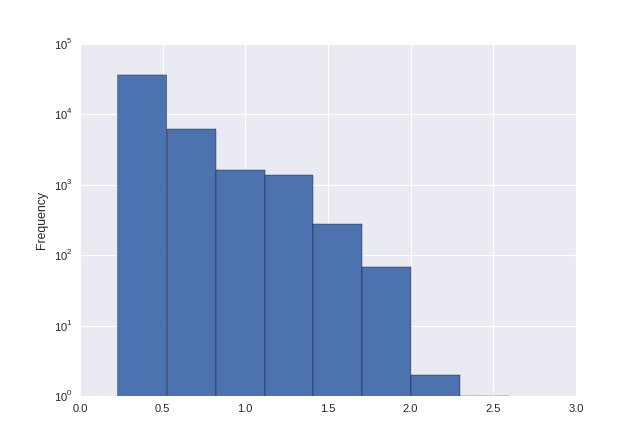

In [100]:
plt.figure()
df['mean'].plot(kind='hist', bins=100, logy=True, xlim=(0,3))

In [105]:
l1a = io.L1AReader('mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01.fits.gz',
                   env='production')

In [106]:
l1a

Filename: mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01.fits.gz
Environment: production
NAXIS : 3
NAXIS1 : 512
NAXIS2 : 32
NAXIS3 : 2

In [107]:
l1a.img.shape

(2, 32, 512)

In [108]:
l1a.img.mean()

15426.932983398438

In [ ]:
l1a.p 

In [69]:
s = df.PRODUCT_ID.str.split('_')
s = s.map(lambda x: x[3]).str.split('-')
df['activity'] = s.map(lambda x: x[0])

In [79]:
df.groupby(['activity','COLLECTION_ID'])['mean'].mean()

activity      COLLECTION_ID
APP1          transition       1.417262
APP2          transition       0.620629
apoapse       disk             0.300909
centroid      calibration      1.625554
comet         transition       0.470771
early         transition       0.755636
inbound       corona           0.411287
occultation   occultation      0.942057
outbound      corona           0.835910
outboundhifi  corona           0.452791
outdisk       disk             0.290992
outdiskhifi   disk             0.622472
outlimb       limb             1.116697
periapse      limb             0.503505
periapsehifi  limb             0.505721
Name: mean, dtype: float64

In [34]:
cols_of_interest = df.columns.drop('anc_svn_revision  bin_tbl code_svn_revision obs_id'
                                   ' orbit_number process product_id'.upper().split())

In [35]:
# df.CHANNEL = df.CHANNEL.map(lambda x: 0 if x=='MUV' else 1)

In [36]:
df=df[cols_of_interest]
# df = df.select_dtypes(include=[float, int])
# df= df.drop('SW_VER NAXIS3'.split(), axis=1)

In [37]:
df = df.dropna(how='any')

In [38]:
df.to_hdf('/Users/klay6683/data/iuvs/dark_stuff/to_study.h5','df')

your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['BIN_PATTERN_INDEX', 'CHANNEL', 'COLLECTION_ID', 'MISSION_PHASE', 'TARGET_NAME', 'BINNING_SET']]

  warnings.warn(ws, PerformanceWarning)



In [40]:
df.head()

,CADENCE,CASE_TEMP,CHANNEL,DET_TEMP,DUTY_CYCLE,FOV_DEG,INT_TIME,LYA_CENTROID,MCP_VOLT,MIRROR_DEG,MIRROR_DN,MIR_DEG,NAXIS,NAXIS1,NAXIS2,N_FILL,SOLAR_LONGITUDE,mean,median,std
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,
2013-12-04 19:02:17.420740,2,14456,5,2351,1,-48.581543,1,1,622.322,-24.290771,4095,-24.288,2,128,128,0,58.333862,241.076477,229,75.493331
2013-12-04 19:02:17.420740,2,14456,0,2402,1,-48.581543,1,1,497.638,-24.290771,4095,-24.288,2,128,128,0,58.333862,213.668213,202,66.896731
2013-12-04 19:03:04.420770,2,14455,5,2351,1,-48.581543,1,1,622.322,-24.290771,4095,-24.288,2,128,128,0,58.334099,23373.713318,24218,6042.129036
2013-12-04 19:03:04.420770,2,14455,0,2400,1,-48.581543,1,1,497.638,-24.290771,4095,-24.288,2,128,128,0,58.334099,17524.360107,17720,4284.540316
2014-04-25 00:07:44.265320,61,15825,5,2361,1,0.494385,60,-1,-1.830,0.247192,13029,0.250,2,512,256,0,121.203468,520.624687,436,348.122660


# Odd things

## Difference between MIRROR_DEG and MIR_DEG

In [80]:
df['mirdeg_delta'] = df.MIRROR_DEG - df.MIR_DEG

<IPython.core.display.Javascript object>


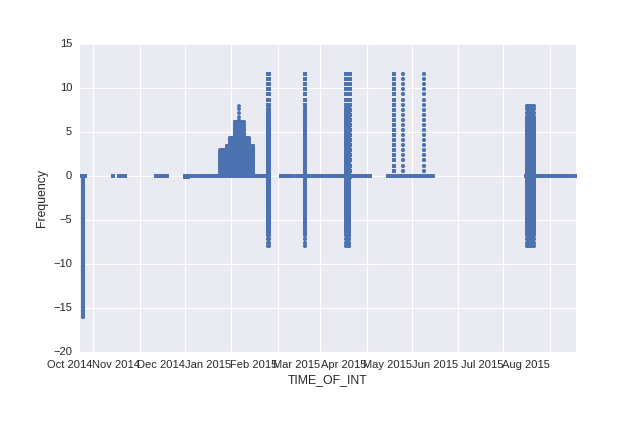

In [81]:
plt.figure()
df.mirdeg_delta.plot(style='.')